In [1]:
import pystan as ps
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# used to force examples to run from local copy, rather than installed copy
import os, sys; sys.path.insert(0, os.path.abspath('../'))
import btom as bt

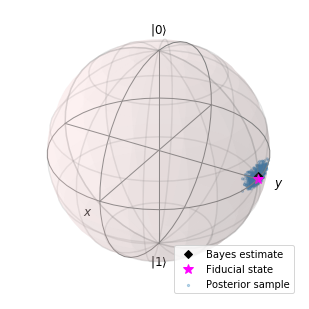

In [17]:
psi = np.array([[1],[1j]])/np.sqrt(2)
rho = np.dot(psi, psi.conj().T)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData.simulate(rho, meas_ops, [100,100,1000])

sampler = bt.BinomialGinibreStateSampler(ginibre_dim=2, n_chains=4)
pos = bt.StatePosterior(sampler, data)
pos.plot_bloch(fiducial_state=rho)

In [ ]:
from scipy.special import logit, expit
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV

vals = pos.purity
maxv, minv = vals.max(), vals.min()
sep = maxv-minv
xs = np.linspace(minv-sep/2, maxv+sep/2, 30)

grid = GridSearchCV(KernelDensity(),
    {'bandwidth': np.linspace(0.01, 1..0, 30)},
    cv=20)
grid.fit(vals[:,np.newaxis])

In [12]:
import scipy.stats as sio
from scipy.special import logit, expit
import statsmodels.api as sm

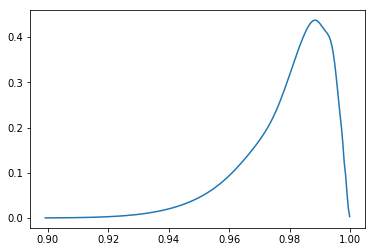

In [40]:
vals = pos.fidelity(rho)
maxv, minv = vals.max(), vals.min()
sep = maxv-minv
xs = np.linspace(minv-sep/2, maxv+sep/2, 300)
kde = sm.nonparametric.KDEUnivariate(logit(vals))
kde.fit(bw=0.2)
plt.plot(xs,kde.evaluate(logit(xs)))

In [28]:
kde = KernelDensity(bandwidth=0.001).fit(pos.purity.reshape(-1,1))

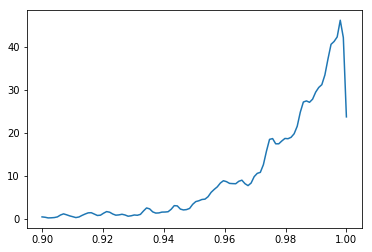

In [29]:
plt.plot(np.linspace(0.9,1,100),np.exp(kde.score_samples(np.linspace(0.9,1,100)[:,np.newaxis])))

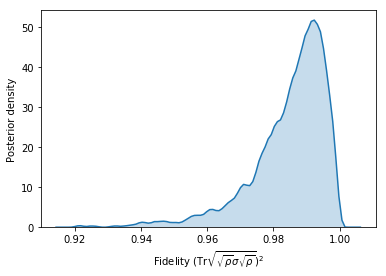

In [5]:
pos.plot_fidelity(rho, kernel='tri')

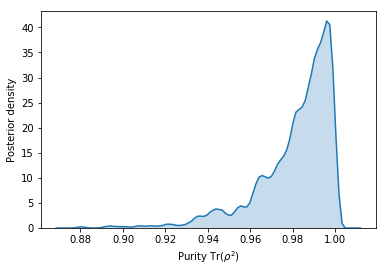

In [31]:
pos.plot_purity(shade=True,clip=[0,1])

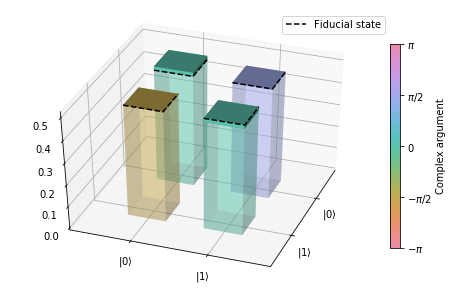

In [5]:
plt.figure(figsize=(8,5))
pos.matrix_plot(fiducial_state=rho)

(2, 4)


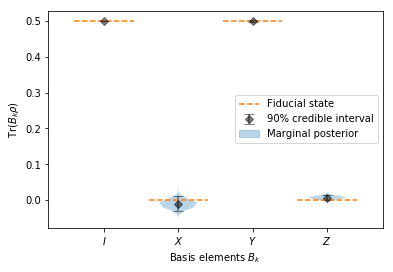

In [6]:
x = pos.basis_expansion_plot(bt.pauli_basis(), fiducial_state=rho)

In [15]:
def _set_labels(ax, labels, d='x'):
    if d == 'x':
        ax.get_xaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)
        ax.set_xlim(0.25, len(labels) + 0.75)
    elif d == 'y':
        ax.get_yaxis().set_tick_params(direction='out')
        ax.yaxis.set_ticks_position('bottom')
        ax.set_yticks(np.arange(1, len(labels) + 1))
        ax.set_yticklabels(labels)
        ax.set_ylim(0.25, len(labels) + 0.75)

In [69]:
import mayavi.mlab as mml

s = numpy.abs(numpy.random.random((3, 3)))
return barchart(s)

ModuleNotFoundError: No module named 'mayavi'

In [160]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

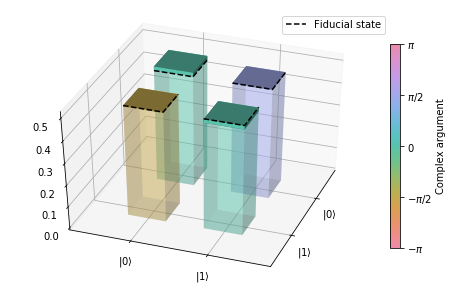

In [159]:
b = bt.canonical_basis(2)
bm = b.outer_product()
#pos._samples = np.array([[[1, 1j],[0.5 * 1j, 4 * np.exp(1j * np.pi)]]])
coeffs = bm.expansion(pos.states)
coeffs.shape

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl

# setup the figure and axes
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
x = np.tile(np.arange(b.n_arrays),b.n_arrays) + 0.75
y = (np.arange(b.n_arrays)).repeat(b.n_arrays) + 0.75

bottom = np.percentile(np.abs(coeffs), 5, axis=1)
top = np.percentile(np.abs(coeffs), 95, axis=1) - bottom
arg = np.mean(np.angle(coeffs), axis=1)
colors = bt.utils.complex_cmap(0.5 * (arg + np.pi) / np.pi)
width = depth = 1

colors[:,3] = 0.3
w = 0.5
ax1.bar3d(x, y, np.zeros_like(bottom), w, w, bottom, color=colors, shade=True)
colors[:,3] = 1
ax1.bar3d(x, y, bottom, w, w, top, color=colors, shade=True)

zaxis = ax1.zaxis
draw_grid_old = zaxis.axes._draw_grid
zaxis.axes._draw_grid = False

idx = 0
for xval, yval, zval in zip(x-0.75+1,y-0.75+1,np.abs(bm.expansion(rho))):
    lab = 'Fiducial state' if idx == 0 else None
    plt.plot([xval+w/2,xval+w/2,xval-w/2],[yval-w/2,yval+w/2,yval+w/2],[zval]*3, '--', c='k', label=lab)
    idx += 1
    
plt.legend()

tmp_planes = zaxis._PLANES

# draw zaxis on the left side
zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                 tmp_planes[0], tmp_planes[1],
                 tmp_planes[4], tmp_planes[5])

zaxis.axes._draw_grid = draw_grid_old

#olourMap = plt.cm.ScalarMappable(cmap=bt.utils.complex_cmap, norm=col.Normalize(-np.pi, np.pi))
#olourMap.set_array(arg)
#olBar = plt.colorbar(colourMap, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi]).set_label('Argument')
#colBar.set_labels((r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'))
cax, kw = mpl.colorbar.make_axes(ax1, shrink=.75, pad=.0)
cb = mpl.colorbar.ColorbarBase(cax, cmap=bt.utils.complex_cmap, norm=col.Normalize(-np.pi, np.pi), label='Complex argument')
cb.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cb.set_ticklabels((r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'))


_set_labels(ax1, ['$' + name + '$' for name in b.names], 'x')
_set_labels(ax1, ['$' + name + '$' for name in b.names], 'y')

ax1.view_init(40, 20)

In [151]:
zlab.

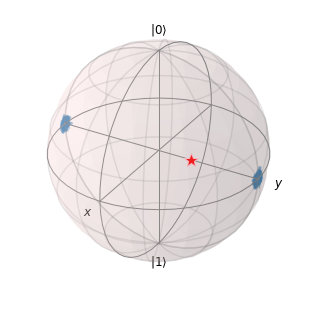

In [3]:
sampler = bt.BinomialGinibreStateSampler(ginibre_dim=1)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData(meas_ops, [1000,0,1000], [500,0,500])
pos = bt.StatePosterior(sampler, data)
a = pos.bloch_plot()

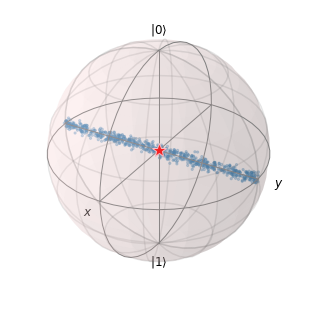

In [5]:
sampler = bt.BinomialGinibreStateSampler(ginibre_dim=2)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData(meas_ops, [5000,0,1000], [2500,0,500])
pos = bt.StatePosterior(sampler, data)
a = pos.bloch_plot()